# Toy HiHack Explore

## Imports

In [23]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
from nle.dataset import dataset
from nle.dataset import db
from nle.dataset import populate_db
from nle.nethack import tty_render
base_path = str(pathlib.Path().resolve())
HIHACK_PATH = os.path.join(base_path[:base_path.find('hihack')], 'hihack')
from hihack_ordinals import HIHACK_ORDINALS
from nle.nethack.actions import ACTIONS

ORDINAL_BACKMAP = {
    v: k for (k, v) in HIHACK_ORDINALS.items()
}

NH_ACTION_IDX_TO_STR = {int(ACTIONS[i]): str(ACTIONS[i]) for i in range(len(ACTIONS))}


## Create `.db` file for fast `ttyrec` reads

In [24]:
dbfilename = 'toy_hihack_explore.db'

In [25]:
if not os.path.isfile(dbfilename):
    data_path = os.path.join(HIHACK_PATH, 'data/toy_hihack')
    db.create(dbfilename)
    populate_db.add_nledata_directory(data_path, 'toy_hihack', dbfilename)

In [26]:
toy_ds = dataset.TtyrecDataset(
                'toy_hihack',
                batch_size=32,
                seq_length=32,
                dbfilename=dbfilename,
            )

## Plot basic dataset statistics (AutoAscend NLE score and turns distributions)

Text(0.5, 0.98, 'Toy HiHack: Basic Dataset Statistics (n = 31)')

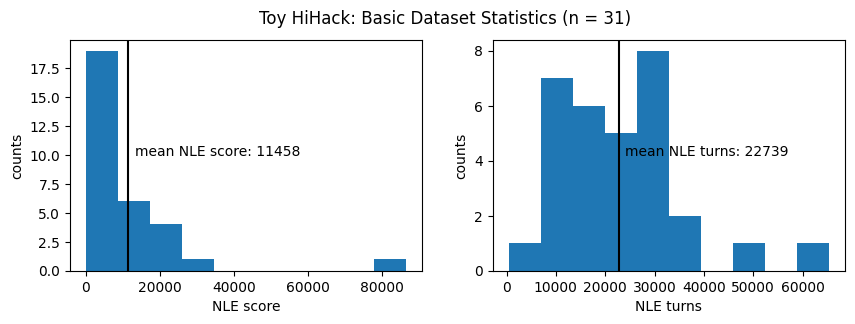

In [27]:
scores = np.array([dict(toy_ds.get_meta(g))['points'] for g in toy_ds._gameids])
turns = np.array([dict(toy_ds.get_meta(g))['turns'] for g in toy_ds._gameids])

fig, (ax0, ax1) = plt.subplots(1, 2)
fig.set_size_inches(10, 3)

ax0.hist(scores)
ax0.axvline(scores.mean(), color='k')
ymin, ymax = ax0.get_ylim()
ax0.text(scores.mean() + scores.max()/50, (ymax - ymin)/2 + ymin, 'mean NLE score: %i' % scores.mean())
ax0.set_xlabel('NLE score')
ax0.set_ylabel('counts')

ax1.hist(turns)
ax1.axvline(turns.mean(), color='k')
ymin, ymax = ax1.get_ylim()
ax1.text(turns.mean() + turns.max()/50, (ymax - ymin)/2 + ymin, 'mean NLE turns: %i' % turns.mean())
ax1.set_xlabel('NLE turns')
ax1.set_ylabel('counts')


fig.suptitle(f'Toy HiHack: Basic Dataset Statistics (n = {len(toy_ds._gameids)})')

## Sample and visualize ttyrecs by strategy/hierarchical label

In [28]:
def viz_example_ttyrecs_by_strategy(game_id=1):
    """
    Samples (uniformly at random) and prints visualizations of ttyrecs 
    corresponding to each of the strategies AutoAscend employed while 
    playing the game with id $GAME_ID in the loaded `NLD` dataset `toy_ds`.
    """
    
    game_ttyrecs = toy_ds.get_ttyrecs([game_id], chunk_size=1)
    
    game_strategies = np.array([game_ttyrecs[i]['strategies'][0, 0] for i in range(len(game_ttyrecs))])
    
    applied_strategies = np.unique(game_strategies)

    for strategy in applied_strategies:
        tty_idxs = np.arange(game_strategies.shape[0])[game_strategies == strategy]
        t = np.random.choice(tty_idxs)

        tty_chars = game_ttyrecs[t]['tty_chars'][0, 0]
        tty_colors = game_ttyrecs[t]['tty_colors'][0, 0]
        tty_cursor = game_ttyrecs[t]['tty_cursor'][0, 0]
        keypresses = game_ttyrecs[t]['keypresses'][0, 0]
        strategies = game_ttyrecs[t]['strategies'][0, 0]

        print(f'[game-id] {game_id}')
        print(f'[keypress-id] {t}')
        print(f'[strategy] {ORDINAL_BACKMAP[strategies]}')
        print(f'[keypress] {NH_ACTION_IDX_TO_STR[keypresses]}')
        print('-' * 80)

        print(tty_render(tty_chars, tty_colors, tty_cursor))
        print('=' * 80)
    

In [29]:
viz_example_ttyrecs_by_strategy()

[game-id] 1
[keypress-id] 54146
[strategy] error
[keypress] TextCharacters.SPACE
--------------------------------------------------------------------------------

                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                           